In [1]:
from sklearn.datasets import load_boston
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
import sklearn.utils
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, ElasticNet, Lasso
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
from sklearn.metrics import make_scorer
from sklearn.naive_bayes import GaussianNB
from vecstack import stacking



%matplotlib inline
sns.set_style('white')
import warnings
# Suppress annoying harmless error.
warnings.simplefilter('ignore')

/home/ljagged/anaconda2/envs/thinkful/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
cols = boston.feature_names

In [6]:
bostonhousing = pd.DataFrame(boston.data)
bostonhousing.columns = boston.feature_names

In [7]:
bostonhousing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bostonhousing['MEDV'] = boston.target

In [9]:
bostonhousing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
bostonhousing['LMEDV'] = np.log(bostonhousing['MEDV'])

In [11]:
X, y = bostonhousing.loc[:,bostonhousing.columns.difference(['MEDV','LMEDV'])], bostonhousing['MEDV']

In [12]:
X.columns

Index(['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'RM', 'TAX', 'ZN'],
      dtype='object')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()

In [15]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_train, y_train))


Coefficients: 
 [-6.23998173e-03  1.24516469e-02  2.78676719e+00 -1.12463481e-01
 -1.44848504e+00  4.07309919e-02 -5.09349120e-01 -1.72406347e+01
 -9.16398679e-01  2.62113793e-01  4.43248784e+00 -1.06390978e-02
  3.00810168e-02]

Intercept: 
 30.28894833937049

R-squared:
0.7508837786732915


In [17]:
X_train['intercept'] = 1
lr = sm.OLS(y_train, X_train.astype(float))
result = lr.fit()


print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Thu, 10 May 2018   Prob (F-statistic):          6.22e-109
Time:                        04:42:33   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0062      0.015     -0.428      0.6

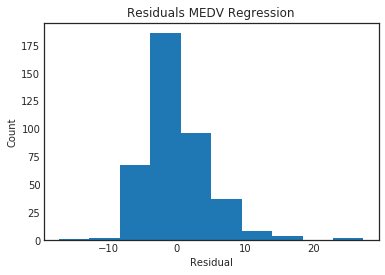

In [18]:
# Extract predicted values.
predicted = regr.predict(X_train.loc[:,X_train.columns.difference(['intercept']).ravel()])
actual = y_train

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residuals MEDV Regression')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

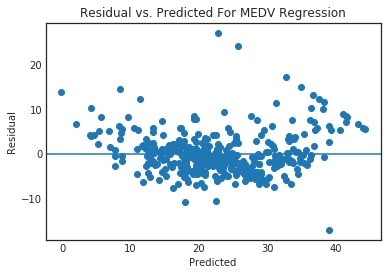

In [19]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted For MEDV Regression')
plt.show()


In [20]:
X, y = bostonhousing.loc[:,bostonhousing.columns.difference(['MEDV','LMEDV'])], bostonhousing['LMEDV']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
X_train['intercept'] = 1
lr = sm.OLS(y_train, X_train.astype(float))
result = lr.fit()


print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  LMEDV   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     116.9
Date:                Thu, 10 May 2018   Prob (F-statistic):          1.28e-125
Time:                        04:42:48   Log-Likelihood:                 106.83
No. Observations:                 404   AIC:                            -185.7
Df Residuals:                     390   BIC:                            -129.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0001      0.001     -0.230      0.8

In [23]:
X_train = X_train.loc[:,X_train.columns.difference(['intercept'])]

In [24]:
regr1 = linear_model.LinearRegression()

In [25]:
regr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print('\nCoefficients: \n', regr1.coef_)
print('\nIntercept: \n', regr1.intercept_)
print('\nR-squared:')
print(regr1.score(X_train, y_train))


Coefficients: 
 [-1.33776925e-04  5.87883222e-04  9.63887194e-02 -9.63852364e-03
 -4.90041576e-02  3.08666787e-03 -2.83863318e-02 -7.30602899e-01
 -3.70708251e-02  1.11179108e-02  1.12545614e-01 -5.04338201e-04
  7.54392755e-04]

Intercept: 
 3.844654713329313

R-squared:
0.7957638722720561


In [27]:
X_train.columns

Index(['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'RM', 'TAX', 'ZN'],
      dtype='object')

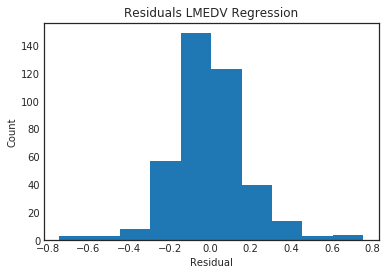

In [28]:
# Extract predicted values.
predicted = regr1.predict(X_train)
actual = y_train

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residuals LMEDV Regression')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

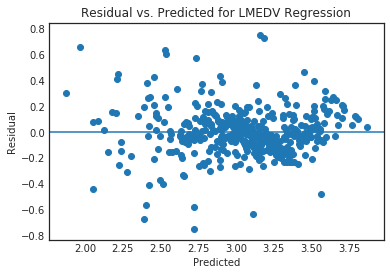

In [29]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted for LMEDV Regression')
plt.show()


In [30]:
y_pred = regr1.predict(X_test)
# Final prediction score
print('Final prediction score: [%.3f]' % r2_score(y_test, y_pred))

Final prediction score: [0.746]
